# Evaluation

In this section the ML models that have been trained in the notebook "Training_ML_Models" will be evaluated with the help of a confusion matrix, f1 score, accurancy, precision, recall and a ROC curve.

## Imports

In [1]:
import importnb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [27]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered
    from Training_ML_Models import X_test, y_test, y_pred_knn, y_pred_knn_tuned, y_pred_rf, y_pred_rf_tuned, y_pred_dt, y_pred_dt_tuned, y_pred_gb, y_pred_gb_tuned, model_knn, model_knn_tuned, model_rf, model_rf_tuned, model_dt, model_dt_tuned, model_gb, model_gb_tuned

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## 1. kNN

### 1.1 Evaluation of Untuned Model

In [3]:
accuracy_model_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_model_knn}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(class_report_knn)

Accuracy: 0.8751147842056933
Confusion Matrix:
[[326 107]
 [ 29 627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       433
           1       0.85      0.96      0.90       656

    accuracy                           0.88      1089
   macro avg       0.89      0.85      0.86      1089
weighted avg       0.88      0.88      0.87      1089



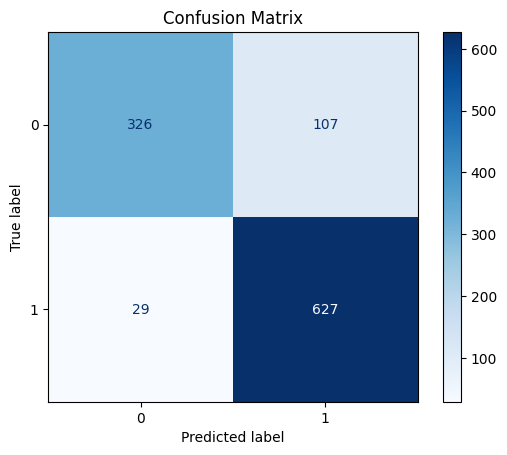

In [4]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

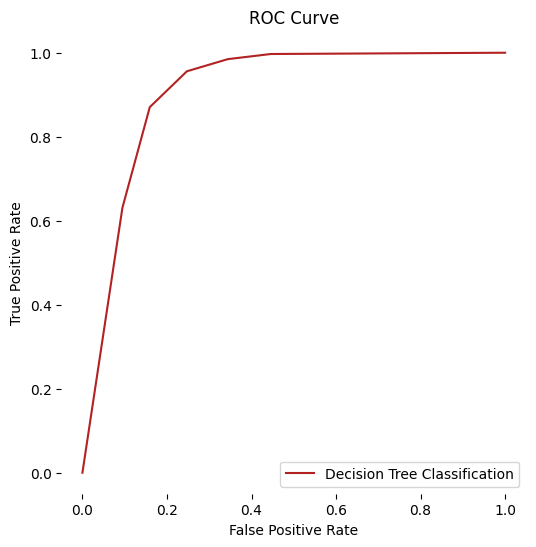

In [5]:
y_pred_probabiblity_knn = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 1.2 Evaluation of Tuned Model

In [6]:
accuracy_model_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
class_report_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

print(f'Accuracy: {accuracy_model_knn_tuned}')
print('Confusion Matrix:')
print(conf_matrix_knn_tuned)
print('Classification Report:')
print(class_report_knn_tuned)

Accuracy: 0.8861340679522498
Confusion Matrix:
[[327 106]
 [ 18 638]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       433
           1       0.86      0.97      0.91       656

    accuracy                           0.89      1089
   macro avg       0.90      0.86      0.88      1089
weighted avg       0.89      0.89      0.88      1089



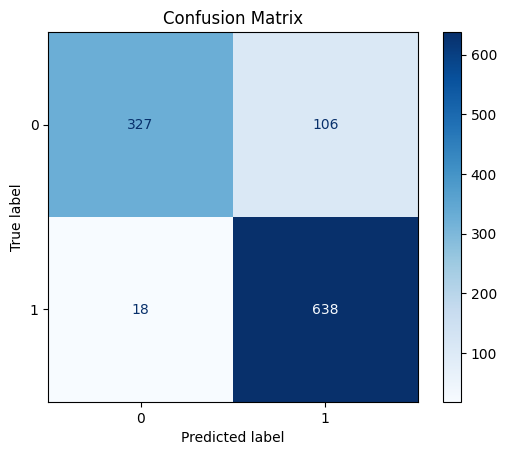

In [7]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

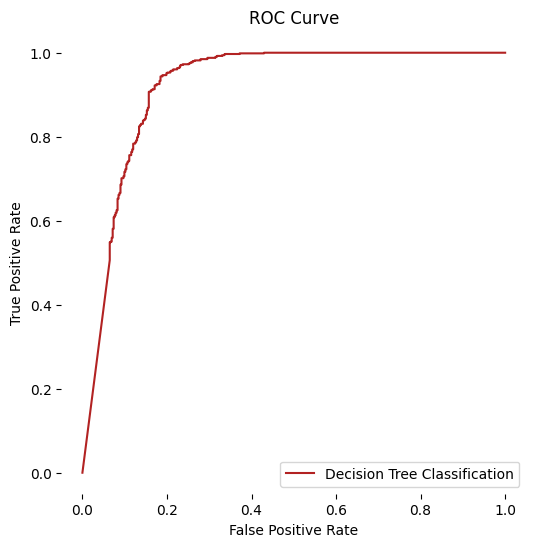

In [8]:
y_pred_probabiblity_knn_tuned = model_knn_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_knn_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

## 2. Random Forest

### 2.1 Evaluation of Untuned Model

In [9]:
accurancy_model_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accurancy_model_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.9035812672176309
Confusion Matrix:
[[359  74]
 [ 31 625]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       433
           1       0.89      0.95      0.92       656

    accuracy                           0.90      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089



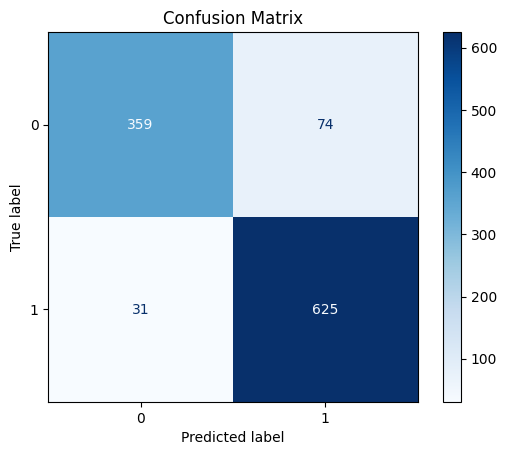

In [10]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

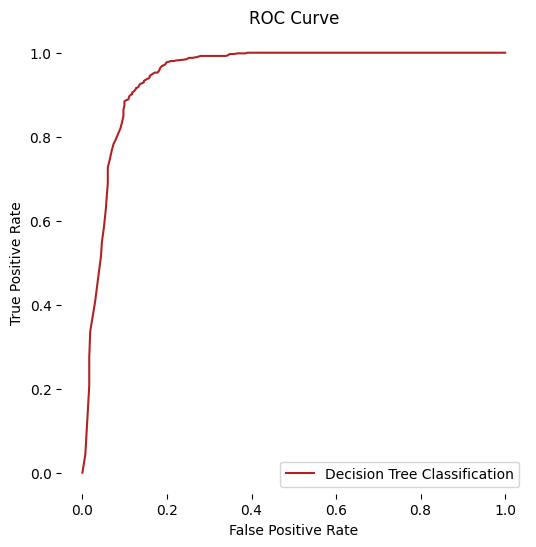

In [11]:
y_pred_probabiblity_rf = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_rf)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 2.2 Evaluation of Tuned Model

In [12]:
accurancy_model_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
class_report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print(f'Accuracy: {accurancy_model_rf_tuned}')
print('Confusion Matrix:')
print(conf_matrix_rf_tuned)
print('Classification Report:')
print(class_report_rf_tuned)

Accuracy: 0.9035812672176309
Confusion Matrix:
[[361  72]
 [ 33 623]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       433
           1       0.90      0.95      0.92       656

    accuracy                           0.90      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089



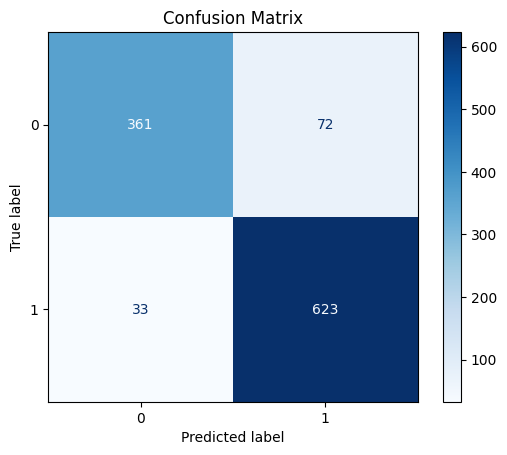

In [13]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

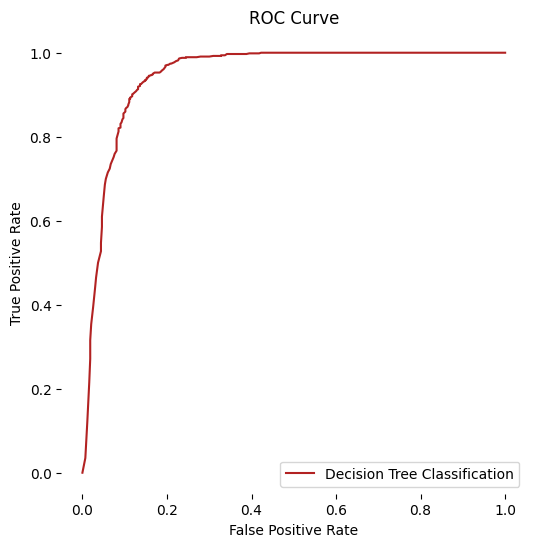

In [14]:
y_pred_probabiblity_rf_tuned = model_rf_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_rf_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 3. Decision Trees

### 3.1 Evaluation of Untuned Model

In [15]:
accuracy_model_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy_model_dt}')
print('Confusion Matrix:')
print(conf_matrix_dt)
print('Classification Report:')
print(class_report_dt)

Accuracy: 0.852157943067034
Confusion Matrix:
[[360  73]
 [ 88 568]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       433
           1       0.89      0.87      0.88       656

    accuracy                           0.85      1089
   macro avg       0.84      0.85      0.85      1089
weighted avg       0.85      0.85      0.85      1089



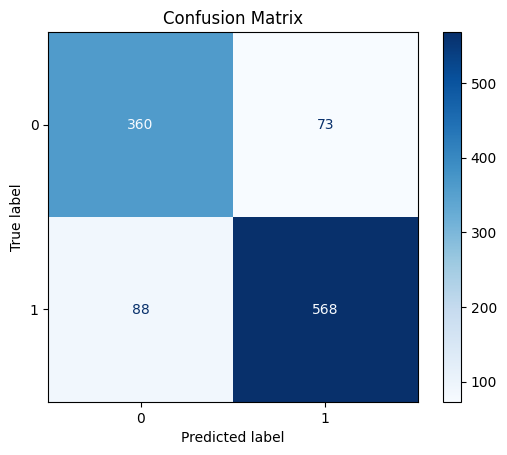

In [16]:
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

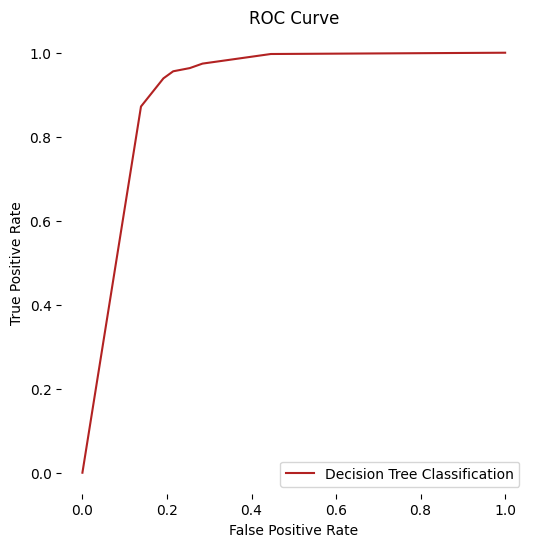

In [17]:
y_pred_probabiblity_dt = model_dt_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_dt)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 3.2 Evaluation of Tuned Model

In [18]:
accuracy_model_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
conf_matrix_model_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
class_report_model_dt_tuned = classification_report(y_test, y_pred_dt_tuned)

print(f'Accuracy: {accuracy_model_dt_tuned}')
print('Confusion Matrix:')
print(conf_matrix_model_dt_tuned)
print('Classification Report:')
print(class_report_model_dt_tuned)

Accuracy: 0.8879706152433425
Confusion Matrix:
[[340  93]
 [ 29 627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       433
           1       0.87      0.96      0.91       656

    accuracy                           0.89      1089
   macro avg       0.90      0.87      0.88      1089
weighted avg       0.89      0.89      0.89      1089



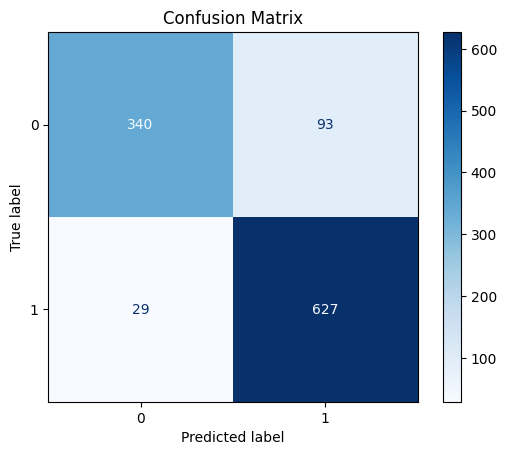

In [19]:
ConfusionMatrixDisplay(conf_matrix_model_dt_tuned, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

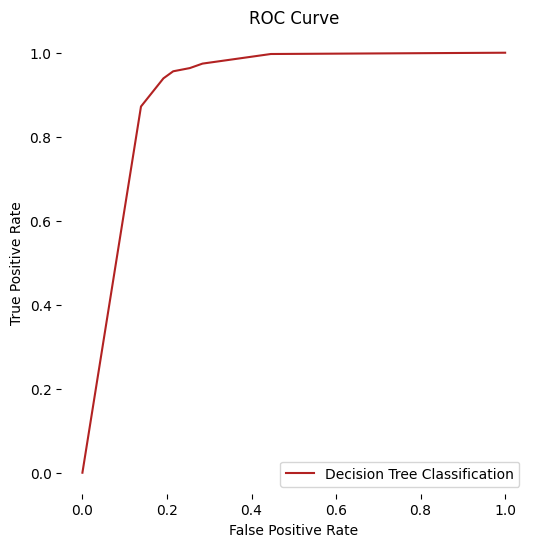

In [20]:
y_pred_probabiblity_dt_tuned = model_dt_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_dt_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 4. Naive Bayes

### 4.1 Evaluation of Untuned Model

In [21]:
accuracy_model_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_model_gb= confusion_matrix(y_test, y_pred_gb)
class_report_model_gb = classification_report(y_test, y_pred_gb)

print(f'Accuracy: {accuracy_model_gb}')
print('Confusion Matrix:')
print(conf_matrix_model_gb)
print('Classification Report:')
print(class_report_model_gb)

Accuracy: 0.8631772268135904
Confusion Matrix:
[[335  98]
 [ 51 605]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       433
           1       0.86      0.92      0.89       656

    accuracy                           0.86      1089
   macro avg       0.86      0.85      0.85      1089
weighted avg       0.86      0.86      0.86      1089



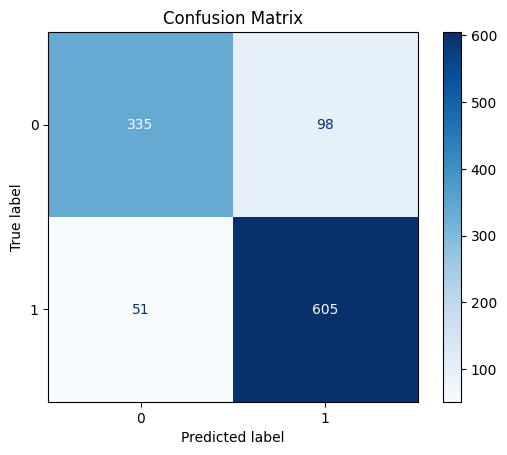

In [22]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_model_gb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

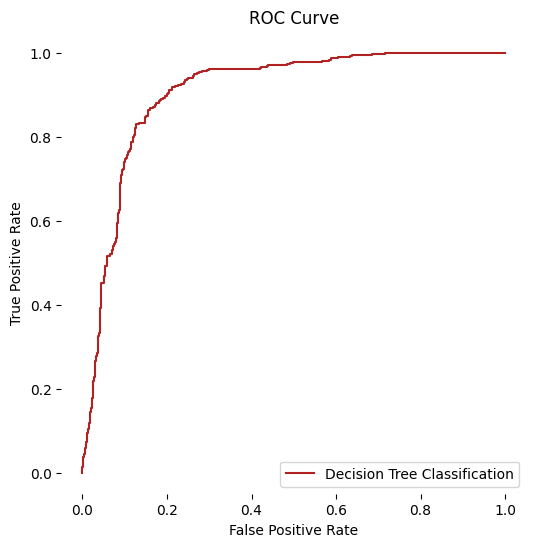

In [23]:
y_pred_probabiblity_gb = model_gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_gb)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 4.2 Evaluation of Tuned Model

In [24]:
accuracy_model_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
conf_matrix_model_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
class_report_model_gb_tuned = classification_report(y_test, y_pred_gb_tuned)

print(f'Accuracy: {accuracy_model_gb_tuned}')
print('Confusion Matrix:')
print(conf_matrix_model_gb_tuned)
print('Classification Report:')
print(class_report_model_gb_tuned)

Accuracy: 0.8604224058769513
Confusion Matrix:
[[328 105]
 [ 47 609]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       433
           1       0.85      0.93      0.89       656

    accuracy                           0.86      1089
   macro avg       0.86      0.84      0.85      1089
weighted avg       0.86      0.86      0.86      1089



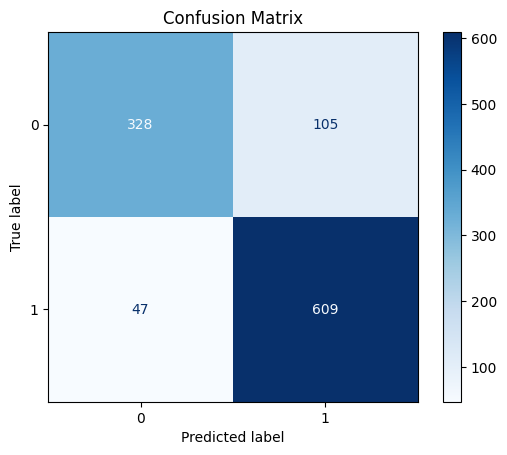

In [25]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_model_gb_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

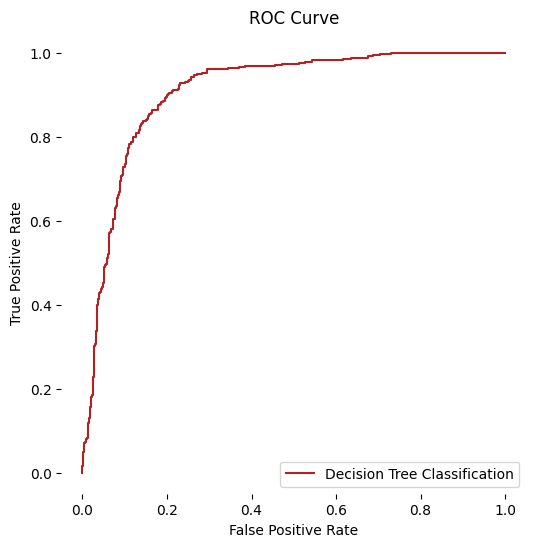

In [26]:
y_pred_probabiblity_gb_tuned = model_gb_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_gb_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

## 5. Result

Decision Tree, Knn, Random Forest very similar results -> Why are they similar -> Why did Random Forest from these 3 Models perform the best (is there
a specific reason)

Why did Naive Bayes perform the waeakest even after hyperparamter tuning?